# PDA data science - Yahoo Finance
<div class="alert alert-block alert-info"> 
    Notebook 4: by Michael Ferrie, March 2022
</div>

## Introduction to API's

For those who might be unfamiliar, API stands for Application Programming Interface. An API is actually an interface that has a set of functions. These set of functions allow programmers to acquire some specific features or the data of an application. Web API is an API as the name suggests, it can be accessed over the web using the HTTP protocol. It is a framework that helps you to create and develop HTTP based RESTFUL services. Once we can access an API programmatically we can create requests to send to it in order to return data that is useful to us. Many companies offer useful public API's and python allows us to connect to these.

## Yahoo Finance
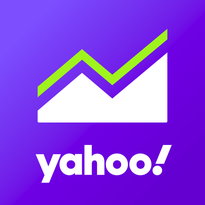

Yahoo Finance used to have their own official API, but this was decommissioned in May 2017, following wide-spread misuse of data. These days a range of unofficial APIs and libraries exist to access the same data, including yfinance.

The project yfinance was developed by [Ran Aroussi](https://aroussi.com/about) and offers a replacement for the old Yahoo API and we can use it with Python to download market data from Yahoo! finance. Before getting started you should install the library with pip:

`pip install yfinance`

With yfinance we can obtain historical and real time data for a variety of financial markets and products, as shown on [Yahoo Finance](https://finance.yahoo.com/). 

A stock ticker reports transaction and price data, these tickers, update continuously throughout the day. Have a look at the list of [tickers](https://finance.yahoo.com/trending-tickers).

OHLC is a financial term for Open Close Low High, this is the value of a stock when the market opens and closes and the lowest point and highest point in a particular duration.

Read through the notebook and run each of the examples then answer the [questions](#Questions) at the end.

<div class="alert alert-block alert-danger">
<bWarningr:</b>If this notebook at any time returns an HTTP error such as 401, we need to pretend to log into the website using this request, this is sometimes called 'posting a session cookie' to do this, run the code in the next cell, each time you see the warning, then re sun your request..
</die'

In [5]:
import requests
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36'}
a = requests.get('https://finance.yahoo.com/quote/AAPL/financials?p=AAPL',headers= headers)
a.raise_for_status()
import warnings
warnings.filterwarnings('ignore')

## Getting a reply from the API

* First we will import the `yfinance` library, then using the Ticker module, we can search for information on Google, they have the abbreviation GOOG, run the following you should get a response from the API. The Ticker module, allows you to access ticker data in a more Pythonic way. `TICKER_NAME.fast_info` provides us with a lot of data on a company, have a look.

In [6]:
# import library
import yfinance as yf

# assign data to a variable, then print result
goog = yf.Ticker("GOOG")
print(goog.fast_info)

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']


In [ ]:
print(goog.fast_info)

## Specifying date ranges
We can specify a date range for data to be returned, The full range of intervals available are:

1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [9]:
# specify 5 days with '5d' of data from the API
data = yf.download(['GOOG'], period='5d')
print(data)

# the data comes from the API as a pandas dataframe
print(type(data))

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-09  153.630005  154.639999  148.199997  149.539993  149.539993   
2024-09-10  151.449997  152.300003  149.542999  150.009995  150.009995   
2024-09-11  151.089996  152.479996  148.699997  152.149994  152.149994   
2024-09-12  154.809998  155.610001  153.500000  155.539993  155.539993   
2024-09-13  156.362000  159.274994  156.110001  158.369995  158.369995   

              Volume  
Date                  
2024-09-09  28057700  
2024-09-10  20401800  
2024-09-11  18991500  
2024-09-12  21024100  
2024-09-13  16708200  
<class 'pandas.core.frame.DataFrame'>


## Access Microsoft finances

Here is how to get some data on Microsoft, we will explore some of the options of the library.All of the available options are here: https://pypi.org/project/yfinance/

In [10]:
# connect to site first
import requests
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36'}
a = requests.get('https://finance.yahoo.com/quote/AAPL/financials?p=AAPL',headers= headers)
a.raise_for_status()

# dowload microsoft ticker
msft = yf.Ticker("MSFT")

# get stock info
msft.fast_info

# get historical market data
hist = msft.history(period="max")

# show major holders
msft.major_holders

# show cashflow
msft.cashflow

# print some of the data
print(msft.cashflow)
print(msft.major_holders)

# show the data type
print(type(msft.cashflow))

                                                    2024-06-30     2023-06-30  \
Free Cash Flow                                   74071000000.0  59475000000.0   
Repurchase Of Capital Stock                     -17254000000.0 -22245000000.0   
Repayment Of Debt                               -29070000000.0  -2750000000.0   
Issuance Of Debt                                 29645000000.0            0.0   
Issuance Of Capital Stock                         2002000000.0   1866000000.0   
Capital Expenditure                             -44477000000.0 -28107000000.0   
End Cash Position                                18315000000.0  34704000000.0   
Beginning Cash Position                          34704000000.0  13931000000.0   
Effect Of Exchange Rate Changes                   -210000000.0   -194000000.0   
Changes In Cash                                 -16179000000.0  20967000000.0   
Financing Cash Flow                             -37757000000.0 -43935000000.0   
Cash Flow From Continuing Fi

## Multiple stocks

We can download data for one ticker using the Ticker object and multiple tickers using the download method.

In [11]:
# get data for google and meta for one month
df = yf.download(['GOOG','META'], period='1mo')

# use head to show only the top of the dataframe
df.head()

[*********************100%***********************]  2 of 2 completed


Price                       Adj Close                   Close              \
Ticker                           GOOG        META        GOOG        META   
Date                                                                        
2024-08-14 00:00:00+00:00  161.816986  526.760010  162.029999  526.760010   
2024-08-15 00:00:00+00:00  162.955490  537.330017  163.169998  537.330017   
2024-08-16 00:00:00+00:00  164.523438  527.419983  164.740005  527.419983   
2024-08-19 00:00:00+00:00  168.178604  529.280029  168.399994  529.280029   
2024-08-20 00:00:00+00:00  168.737885  526.729980  168.960007  526.729980   

Price                            High                     Low              \
Ticker                           GOOG        META        GOOG        META   
Date                                                                        
2024-08-14 00:00:00+00:00  164.960007  534.000000  159.529999  523.130005   
2024-08-15 00:00:00+00:00  163.520004  539.770020  161.490005  526.700012   
2024-08-16 00:00:00+00:00  166.949997  533.659973  163.080002  524.659973   
2024-08-19 00:00:00+00:00  168.470001  531.659973  166.089996  522.760010   
2024-08-20 00:00:00+00:00  170.410004  531.090027  168.660004  525.880005   

Price                            Open                Volume            
Ticker                           GOOG        META      GOOG      META  
Date                                                                   
2024-08-14 00:00:00+00:00  164.210007  528.059998  22515900  11444200  
2024-08-15 00:00:00+00:00  162.210007  531.789978  18392500  13482100  
2024-08-16 00:00:00+00:00  163.410004  531.900024  16853100  14776700  
2024-08-19 00:00:00+00:00  167.000000  526.869995  13100800   9879700  
2024-08-20 00:00:00+00:00  168.740005  528.349976  12622500   7944400

In [12]:
# Specify the date range and group by ticker
# Remember dates are in american middle endian
df = yf.download(['GOOG','META'], start='2022-01-01', 
                 end='2022-01-31', group_by='ticker')
df.head()

[*********************100%***********************]  2 of 2 completed


Ticker                           META                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2022-01-03 00:00:00+00:00  338.299988  341.079987  337.190002  338.540009   
2022-01-04 00:00:00+00:00  339.950012  343.089996  331.869995  336.529999   
2022-01-05 00:00:00+00:00  333.019989  335.760010  323.839996  324.170013   
2022-01-06 00:00:00+00:00  322.820007  339.170013  322.720001  332.459991   
2022-01-07 00:00:00+00:00  332.739990  337.000000  328.880005  331.790009   

Ticker                                                 GOOG              \
Price                       Adj Close    Volume        Open        High   
Date                                                                      
2022-01-03 00:00:00+00:00  337.845764  14537900  144.475494  145.550003   
2022-01-04 00:00:00+00:00  335.839874  15998000  145.550507  146.610001   
2022-01-05 00:00:00+00:00  323.505249  20564500  144.181000  144.298004   
2022-01-06 00:00:00+00:00  331.778198  27962800  137.497498  139.686005   
2022-01-07 00:00:00+00:00  331.109589  14722000  137.904999  138.254745   

Ticker                                                                   
Price                             Low       Close   Adj Close    Volume  
Date                                                                     
2022-01-03 00:00:00+00:00  143.502502  145.074493  144.719086  25214000  
2022-01-04 00:00:00+00:00  143.816147  144.416504  144.062714  22928000  
2022-01-05 00:00:00+00:00  137.523499  137.653503  137.316284  49642000  
2022-01-06 00:00:00+00:00  136.763504  137.550995  137.214035  29050000  
2022-01-07 00:00:00+00:00  135.789001  137.004501  136.668869  19408000

## Bitcoin value in USD
Let's have a look at some Bitcoin data, this will pull the Bitcoin value for the first week in February 2022, we can set the interval to 1 hour so that we can see the value change.

In [27]:
df = yf.download(['BTC-USD'], start='2023-02-01', end='2023-02-07', interval='1h')
df.head()
print(df)

[*********************100%***********************]  1 of 1 completed

                                   Open          High           Low  \
Datetime                                                              
2023-02-01 00:00:00+00:00  23137.835938  23151.828125  23053.238281   
2023-02-01 01:00:00+00:00  23095.353516  23166.132812  23070.189453   
2023-02-01 02:00:00+00:00  23134.908203  23134.908203  23098.316406   
2023-02-01 03:00:00+00:00  23113.835938  23124.640625  23076.847656   
2023-02-01 04:00:00+00:00  23126.605469  23152.449219  23122.220703   
...                                 ...           ...           ...   
2023-02-06 19:00:00+00:00  23008.931641  23100.650391  23006.271484   
2023-02-06 20:00:00+00:00  23025.281250  23027.941406  22990.765625   
2023-02-06 21:00:00+00:00  23014.103516  23014.214844  22938.072266   
2023-02-06 22:00:00+00:00  22936.464844  22936.464844  22882.900391   
2023-02-06 23:00:00+00:00  22893.603516  22893.603516  22692.025391   

                                  Close     Adj Close     Volume  
Datetime 

## Get some statistics from the data
Once we get the data into a pandas dataframe we can run many possible operations on it, have a look at the [list](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html). There are so many possibilities, the trick is being able to understand the documentation so you can use them. Here are some examples:

In [28]:
# Describe will give you an overview of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02
mean,23334.385864,23378.009535,23287.556302,23332.457126,23332.457126,1.979246e+08
std,316.724562,324.878439,314.638003,320.507914,320.507914,4.183393e+08
min,22788.113281,22809.917969,22692.025391,22759.402344,22759.402344,0.000000e+00
25%,23069.079590,23099.821289,22987.965820,23056.703613,23056.703613,0.000000e+00
50%,23374.105469,23402.467773,23344.605469,23373.636719,23373.636719,2.981888e+06
75%,23530.791016,23558.031738,23455.354980,23531.954590,23531.954590,2.261883e+08
max,24157.884766,24167.210938,23981.306641,24158.632812,24158.632812,3.253686e+09


In [29]:
# Access a specific column in the data with []
print(df["High"].mean())
print(df["High"].min())
print(df["High"].max())
print(df["High"].median())


23378.009535047742
22809.91796875
24167.2109375
23402.4677734375


## Visualise the data
Pandas has a simple plot function and it will let us access specific columns in the dataframe, it understands the shape of the data and it is easy to work with. This will allow us to see the Bitcoin value in USD over the week that we have data for. Something obviously happened on the 4th of February to cause the spike. The best day to buy bitcoin that week would have been on the 3rd.

<Axes: xlabel='Datetime'>

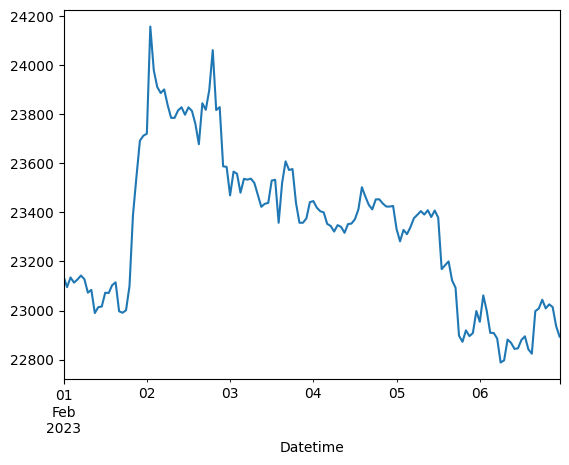

In [30]:
# Plot the open column
df["Open"].plot()

<Axes: xlabel='Datetime'>

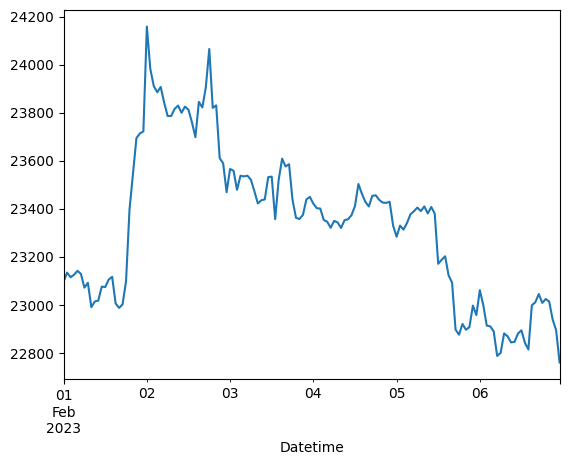

In [31]:
# Plot the close column
df[ "Close"].plot()

<Axes: title={'center': 'My Plot'}, xlabel='Date', ylabel='Value in USD'>

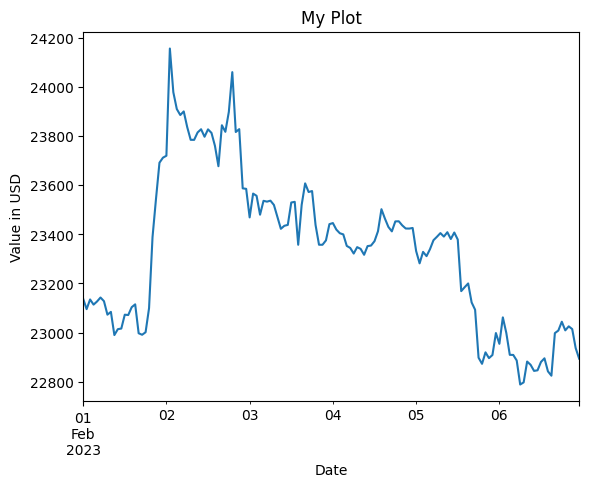

In [32]:
# Adding some extra details to the plot
df['Open'].plot(kind='line', title="My Plot", xlabel="Date", ylabel="Value in USD")

## Multiple line Plots
Now if we want to compare two plots side by side we need another library, if you have not already, install Matplotlib, we need to use pyplot from this library for this next task.

`pip install matplotlib`

First we want to pass multiple columns in the data frame to the plot function, and assign them a colour, then we can add a title and some labels, and a legend.

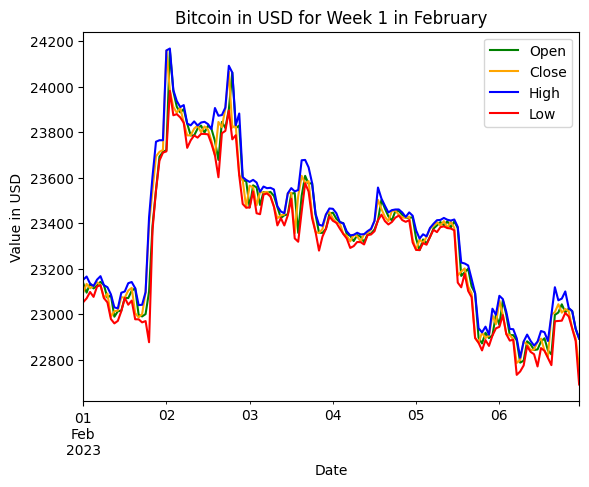

In [33]:
# import pyplot
import matplotlib.pyplot as plt

# use the plot method on each of the columsn in the dataframe
df['Open'].plot(label='Open', color='green')
df['Close'].plot(label='Close', color='orange')
df['High'].plot(label='High', color='blue')
df['Low'].plot(label='Low', color='red')

# adding title to the plot
plt.title('Bitcoin in USD for Week 1 in February')
  
# adding labels to the axes, add a legend
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.legend()

## Figure size

Our multi line plot looks a bit squashed, here are some options to make it better, `figsize` lets us specify the size of the chart in <b>inches</b>, by default all charts come out as 6.4x4.8 inches. The chart will look better at a bigger size, let us also specify the quality of the image as 150 dpi. The plot will be easier to see if we increase this, but it might take slightly longer to render.

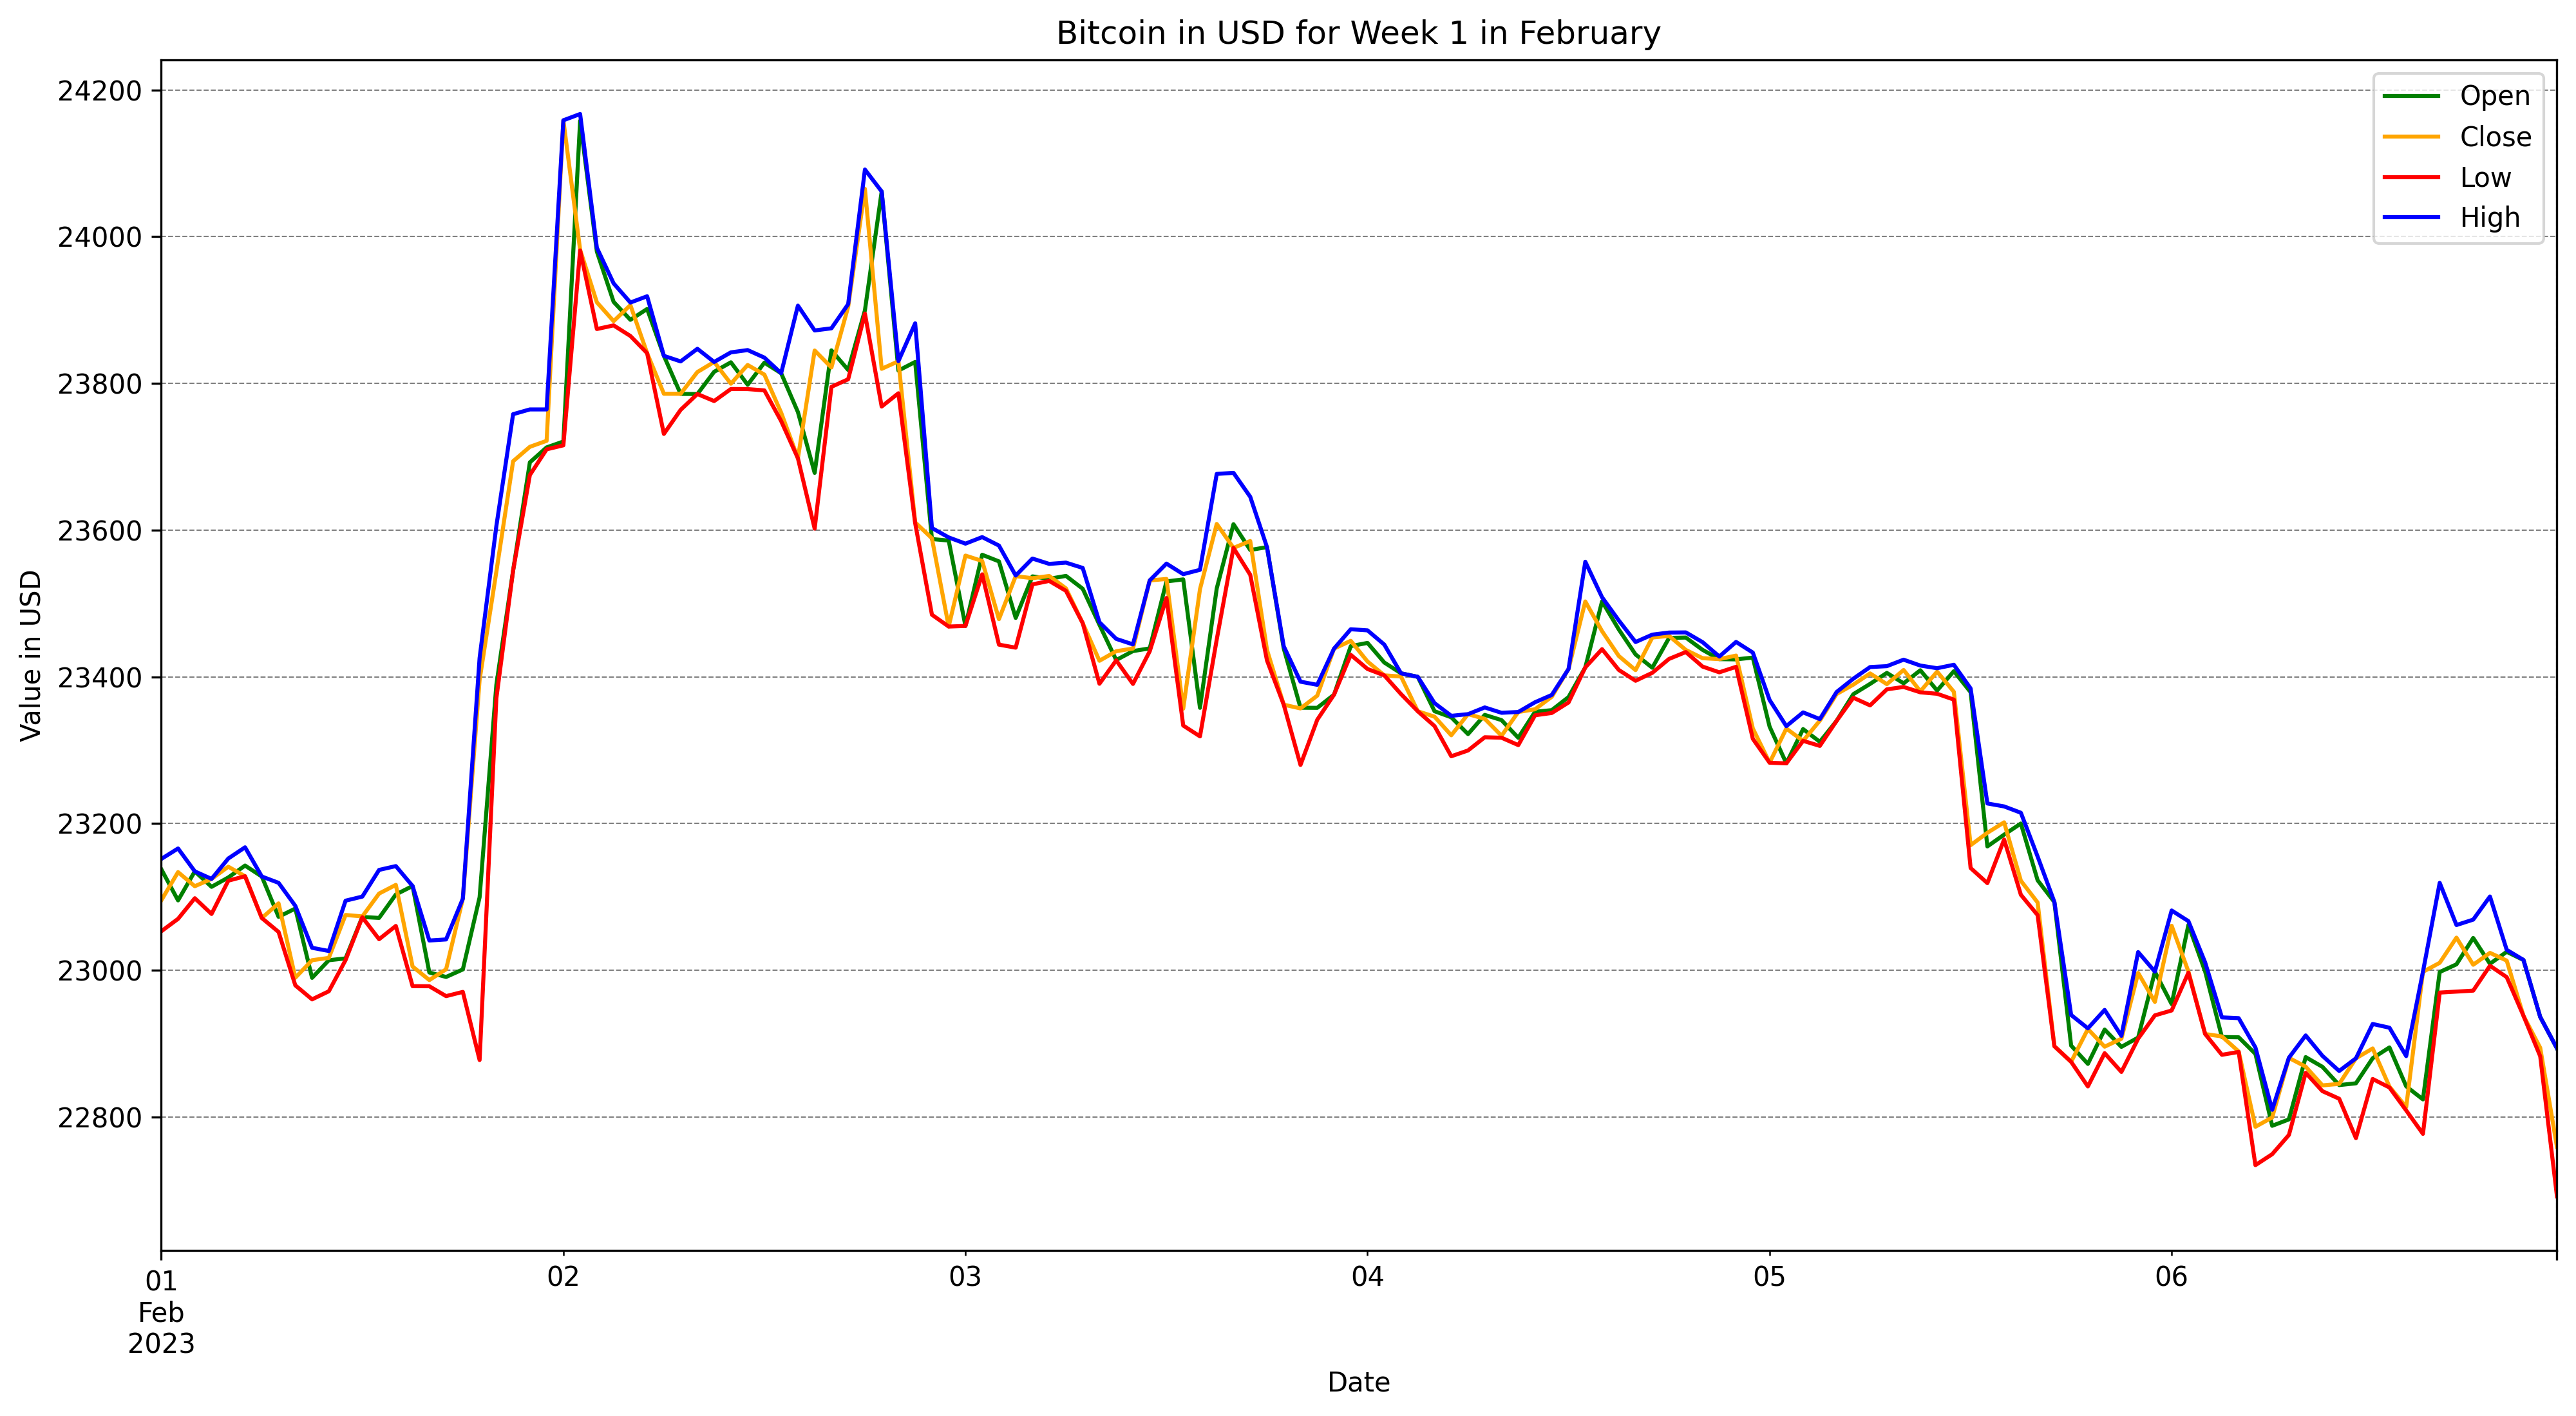

In [34]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=300)

# use the plot method on each of the columsn in the dataframe
df['Open'].plot(label='Open', color='green')
df['Close'].plot(label='Close', color='orange')
df['Low'].plot(label='Low', color='red')
df['High'].plot(label='High', color='blue')


# adding title to the plot
plt.title('Bitcoin in USD for Week 1 in February')
  
# adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

## Introducing `mplfinance`

Mplfinance is a fantastic library for visualising financial data, first install with pip, documentation is here:

https://github.com/matplotlib/mplfinance

`pip install mplfinance`

If we can get data from `yfinance` we can use `mplfinance` to plot the data.

In [35]:
# import libraries
import mplfinance as mpf
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [37]:
# get data on google for a 5 day period
data = yf.download(['GOOG'], period='5d')
data.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,153.468399,154.860999,151.210599,153.121994,153.121994,2.103666e+07
std,2.232133,2.842581,3.442137,3.769890,3.769890,4.260764e+06
min,151.089996,152.300003,148.199997,149.539993,149.539993,1.670820e+07
25%,151.449997,152.479996,148.699997,150.009995,150.009995,1.899150e+07
50%,153.630005,154.639999,149.542999,152.149994,152.149994,2.040180e+07
75%,154.809998,155.610001,153.500000,155.539993,155.539993,2.102410e+07
max,156.362000,159.274994,156.110001,158.369995,158.369995,2.805770e+07


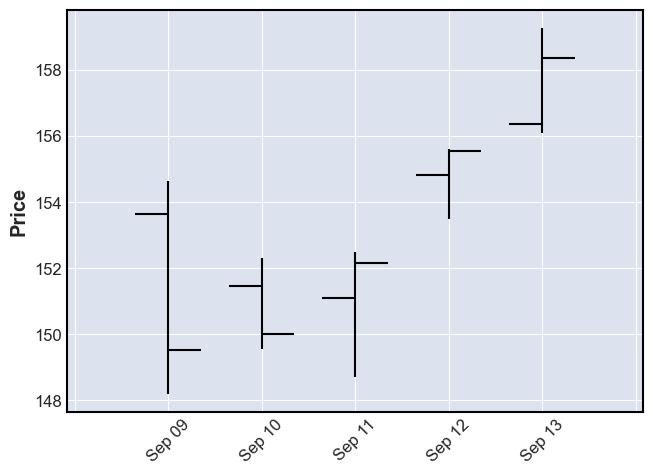

In [38]:
# basic OHLC plot data
mpf.plot(data)

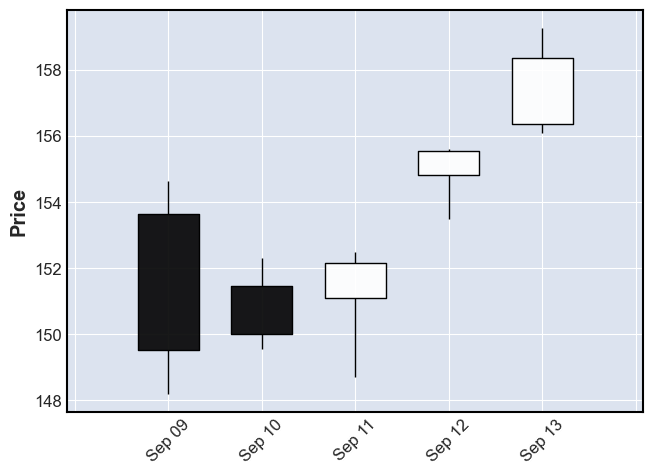

In [39]:
mpf.plot(data, type='candle')

# Bitcoin prices in USD

In [40]:
# make a dataframe of the bitcoin value for every day in months 1-5 of 2023
df = yf.download(['BTC-USD'], start='2022-01-01', end='2022-05-23', interval='1d')
df.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02
mean,40074.627792,40884.422494,39088.382647,39963.629346,39963.629346,2.870882e+10
std,4378.595532,4334.716784,4486.984941,4422.342252,4422.342252,1.069696e+10
min,28720.359375,29588.869141,26350.490234,28720.271484,28720.271484,1.373656e+10
25%,38128.205078,39116.948242,37303.350586,38075.894531,38075.894531,2.177991e+10
50%,40538.998047,41440.767578,39504.611328,40492.835938,40492.835938,2.727147e+10
75%,42860.261719,43742.707031,42011.559570,42770.566406,42770.566406,3.258537e+10
max,47680.925781,48086.835938,47100.437500,47686.812500,47686.812500,8.419661e+10


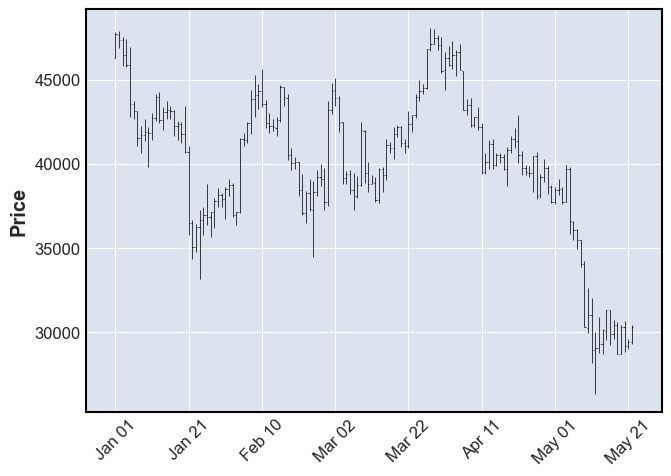

In [41]:
# plot data
mpf.plot(df)

The [documentation on github](https://github.com/matplotlib/mplfinance) shows different examples.

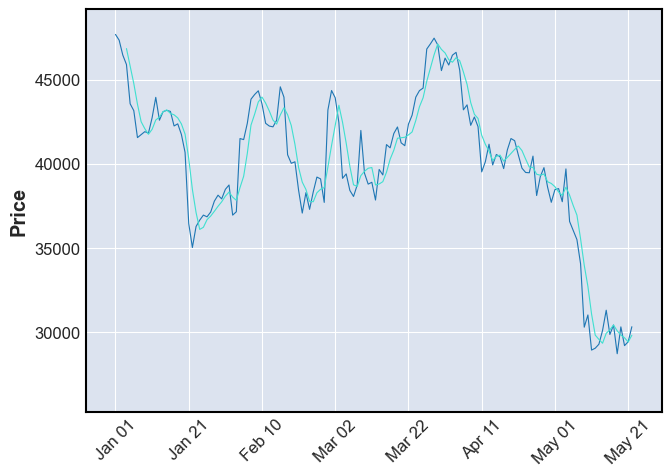

In [42]:
# line plot with moving average
mpf.plot(df, type='line', mav=4)

# GBP vs USD year to date daily

In [43]:
gbpusd = yf.download(['GBPUSD=X'], start='2022-01-01', end='2022-05-23', interval='1d')
gbpusd.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,1.316690,1.320537,1.311665,1.316711,1.316711,0.0
std,0.042053,0.041380,0.042895,0.042094,0.042094,0.0
min,1.220435,1.224515,1.215717,1.220614,1.220614,0.0
25%,1.302393,1.306451,1.299520,1.302575,1.302575,0.0
50%,1.318270,1.321292,1.311648,1.318096,1.318096,0.0
75%,1.353510,1.356820,1.349888,1.353467,1.353467,0.0
max,1.371291,1.374949,1.370558,1.371366,1.371366,0.0


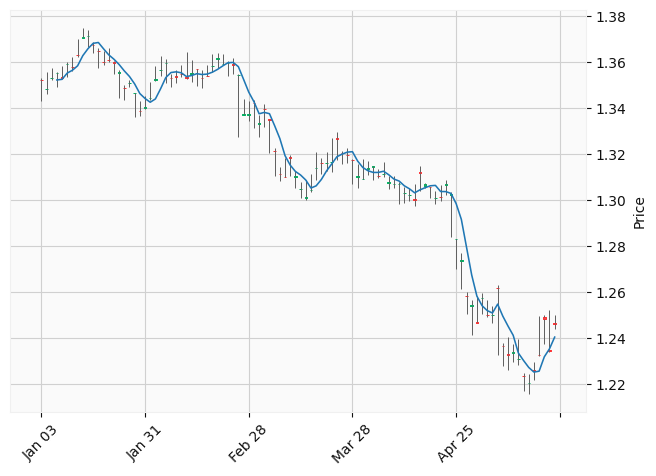

In [44]:
#line plot
mpf.plot(gbpusd, type='candle', mav=4, style='yahoo')

[*********************100%***********************]  1 of 1 completed


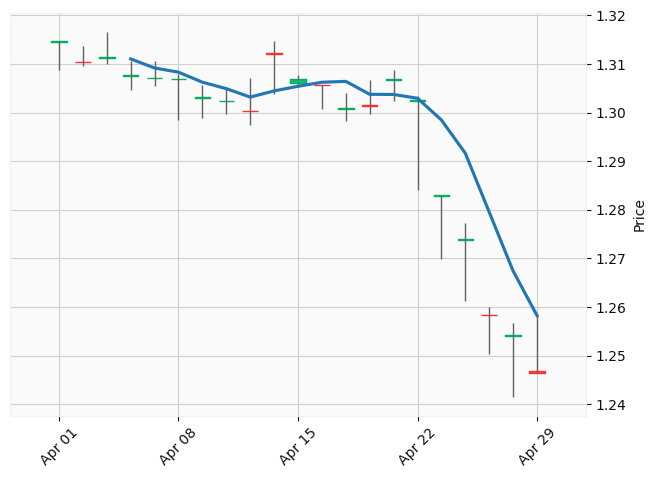

In [45]:
# gbp vs usd month of April 2022
gbpusd_apr = yf.download(['GBPUSD=X'], start='2022-04-01', end='2022-04-30', interval='1d')

#line plot
mpf.plot(gbpusd_apr, type='candle', mav=4, style='yahoo')

[*********************100%***********************]  1 of 1 completed


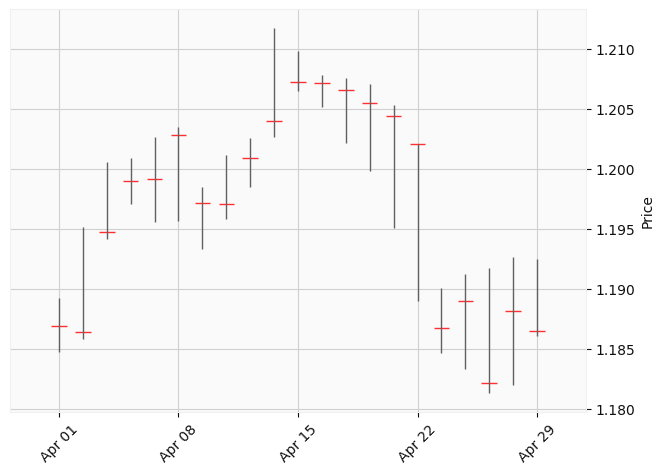

In [46]:
# gbp vs euro month of April 2022
gbpeur_apr = yf.download(['GBPEUR=X'], start='2022-04-01', end='2022-04-30', interval='1d')

# line plot
mpf.plot(gbpeur_apr, type='candle', style='yahoo')

# S & P 500

[*********************100%***********************]  1 of 1 completed


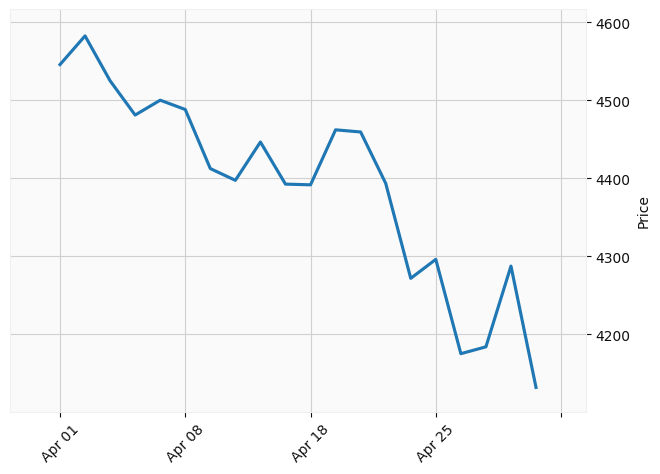

In [47]:
# snp month of April 2022
snp = yf.download(['^GSPC'], start='2022-04-01', end='2022-04-30', interval='1d')

# line plot
mpf.plot(snp, type='line', style='yahoo')

[*********************100%***********************]  1 of 1 completed


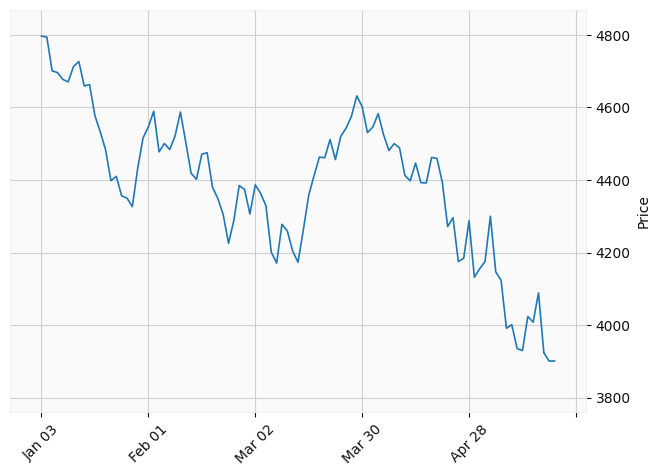

In [48]:
# january to may 2022
snp_ytd = yf.download(['^GSPC'], start='2022-01-01', end='2022-05-23', interval='1d')

# line plot
mpf.plot(snp_ytd, type='line', style='yahoo')

[*********************100%***********************]  1 of 1 completed


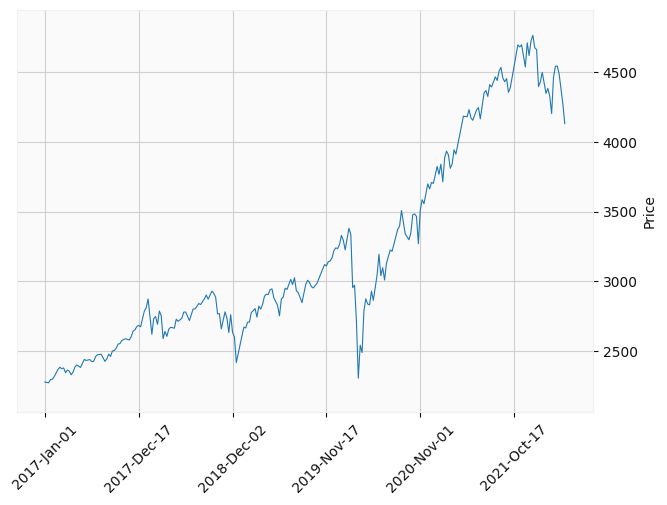

In [49]:
# maybe some good news if we look at it over 5y
snp_5y = yf.download(['^GSPC'], start='2017-01-01', end='2022-05-01', interval='1wk')

# line plot
mpf.plot(snp_5y, type='line', style='yahoo')

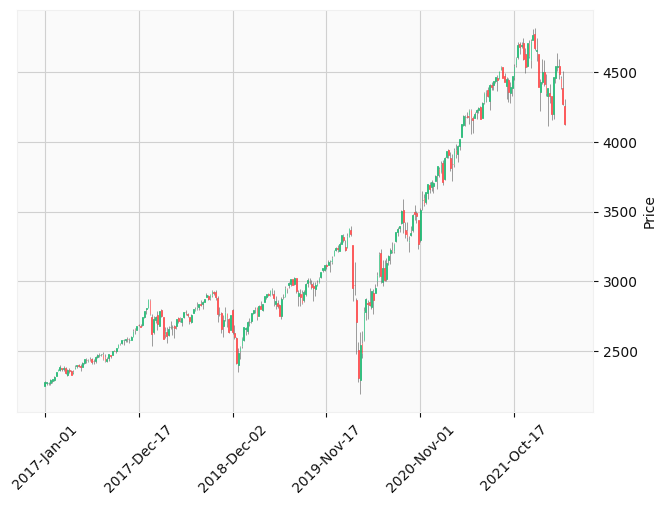

In [50]:
# line plot
mpf.plot(snp_5y, type='candle', style='yahoo')

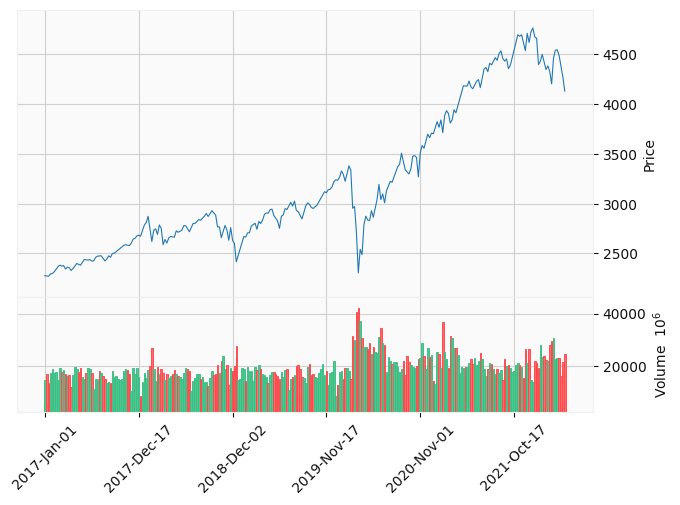

In [51]:
# line plot
mpf.plot(snp_5y, type='line', style='yahoo', volume=True)

# Questions
Add your solution to the questions below

5.1 Plot the Bitcoin value in USD using the high column for the whole month of January last year, set the interval to 1 hour?

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

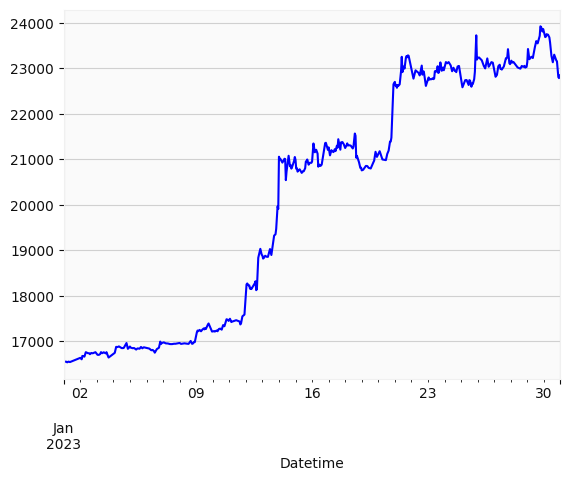

In [52]:
# your answer below this line
df = yf.download(['BTC-USD'], start='2023-01-01', end='2023-01-31', interval='1h')
df['High'].plot(label='High', color='blue')


5.2 Create a plot of the Bitcoin value in USD using the high column for the whole of last year, set the interval to 1 day?

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

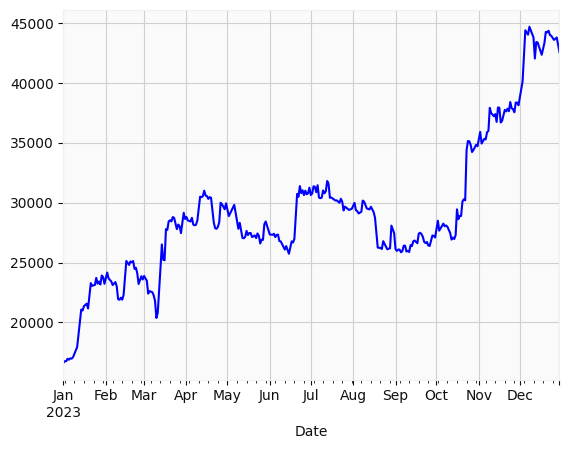

In [53]:
# your answer below this line
df = yf.download(['BTC-USD'], start='2023-01-01', end='2023-12-31', interval='1d')
df['High'].plot(label='High', color='blue')


5.3 Plot the Bitcoin value in USD using the close column for as far back as you can get data for, this could be a number of years?

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

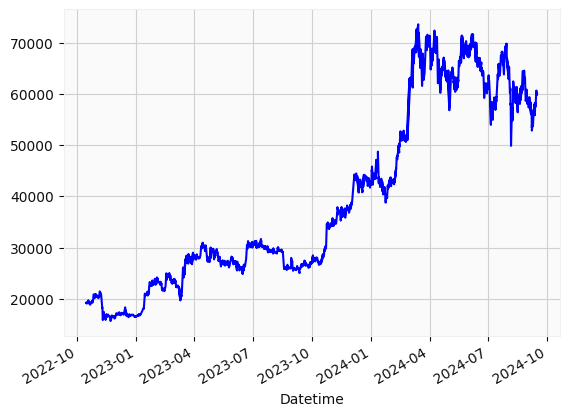

In [66]:
# your answer below this line
df = yf.download(['BTC-USD'], start='2022-10-15', end='2024-09-15', interval='1h')
df['Close'].plot(label='Close', color='blue')


5.4 Go to the [Cryptocurency tickers list](https://finance.yahoo.com/cryptocurrencies) find the name of the Etherium USD ticker and then create a plot of the value of Etherium in USD using the high column for the whole of last year, set the interval to 1 day?

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

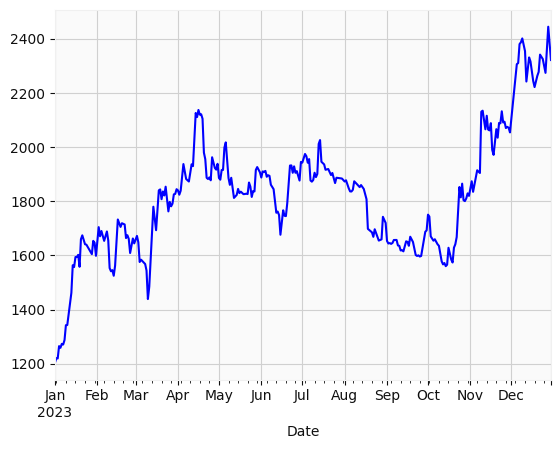

In [67]:
# your answer below this line
df = yf.download(['ETH-USD'], start='2023-01-01', end='2023-12-31', interval='1d')
df['High'].plot(label='High', color='blue')


5.5 Go to the [Most active tickers list](https://finance.yahoo.com/most-active) and find the top two most active stocks. Create a plot that compares their high value for every day last year. The plot should have two lines in different colours, there should be a legend and axis labels.

[*********************100%***********************]  2 of 2 completed


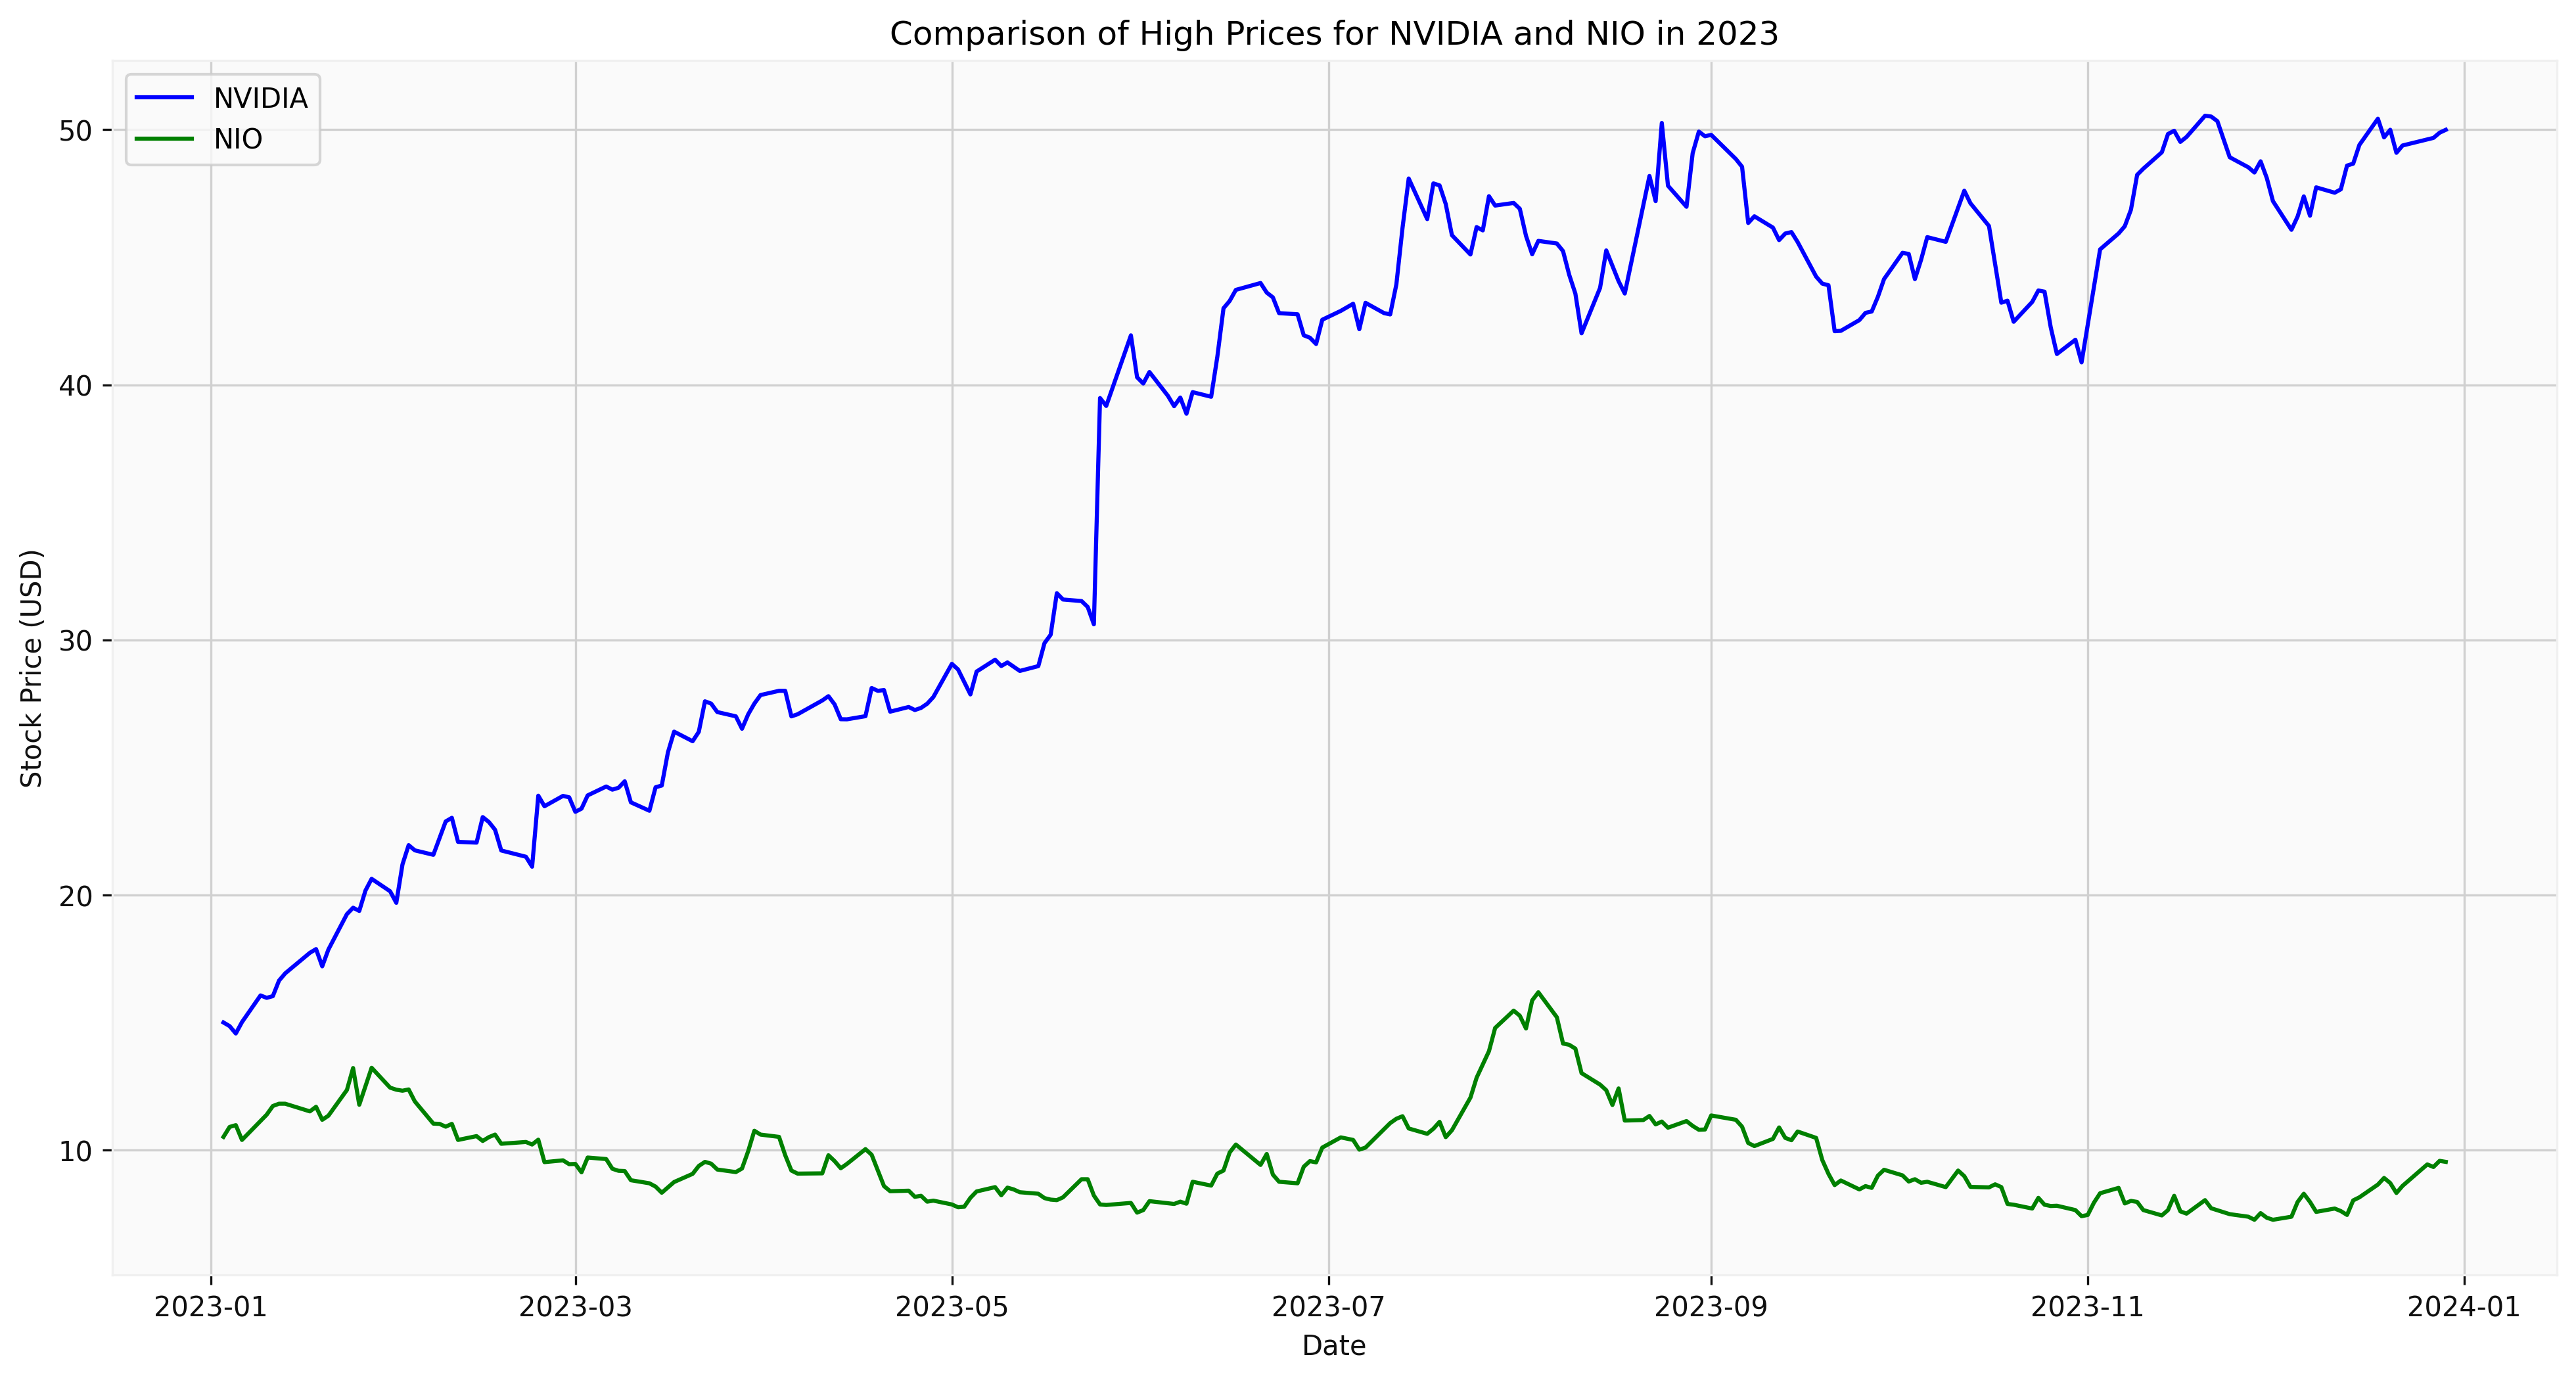

In [75]:
# your answer below this line
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for NVIDIA and NIO for the last year
tickers = ['NVDA', 'NIO']
data = yf.download(tickers, start='2023-01-01', end='2023-12-31')

# Plot the 'High' column for both stocks
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(data['High']['NVDA'], label='NVIDIA', color='blue')
plt.plot(data['High']['NIO'], label='NIO', color='green')

# Add labels, title, and legend
plt.title('Comparison of High Prices for NVIDIA and NIO in 2023')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()

# Show the plot
plt.show()




5.6 Adapt your plot from the previous question to show the high value of the top 4 stocks in the list?

[*********************100%***********************]  4 of 4 completed


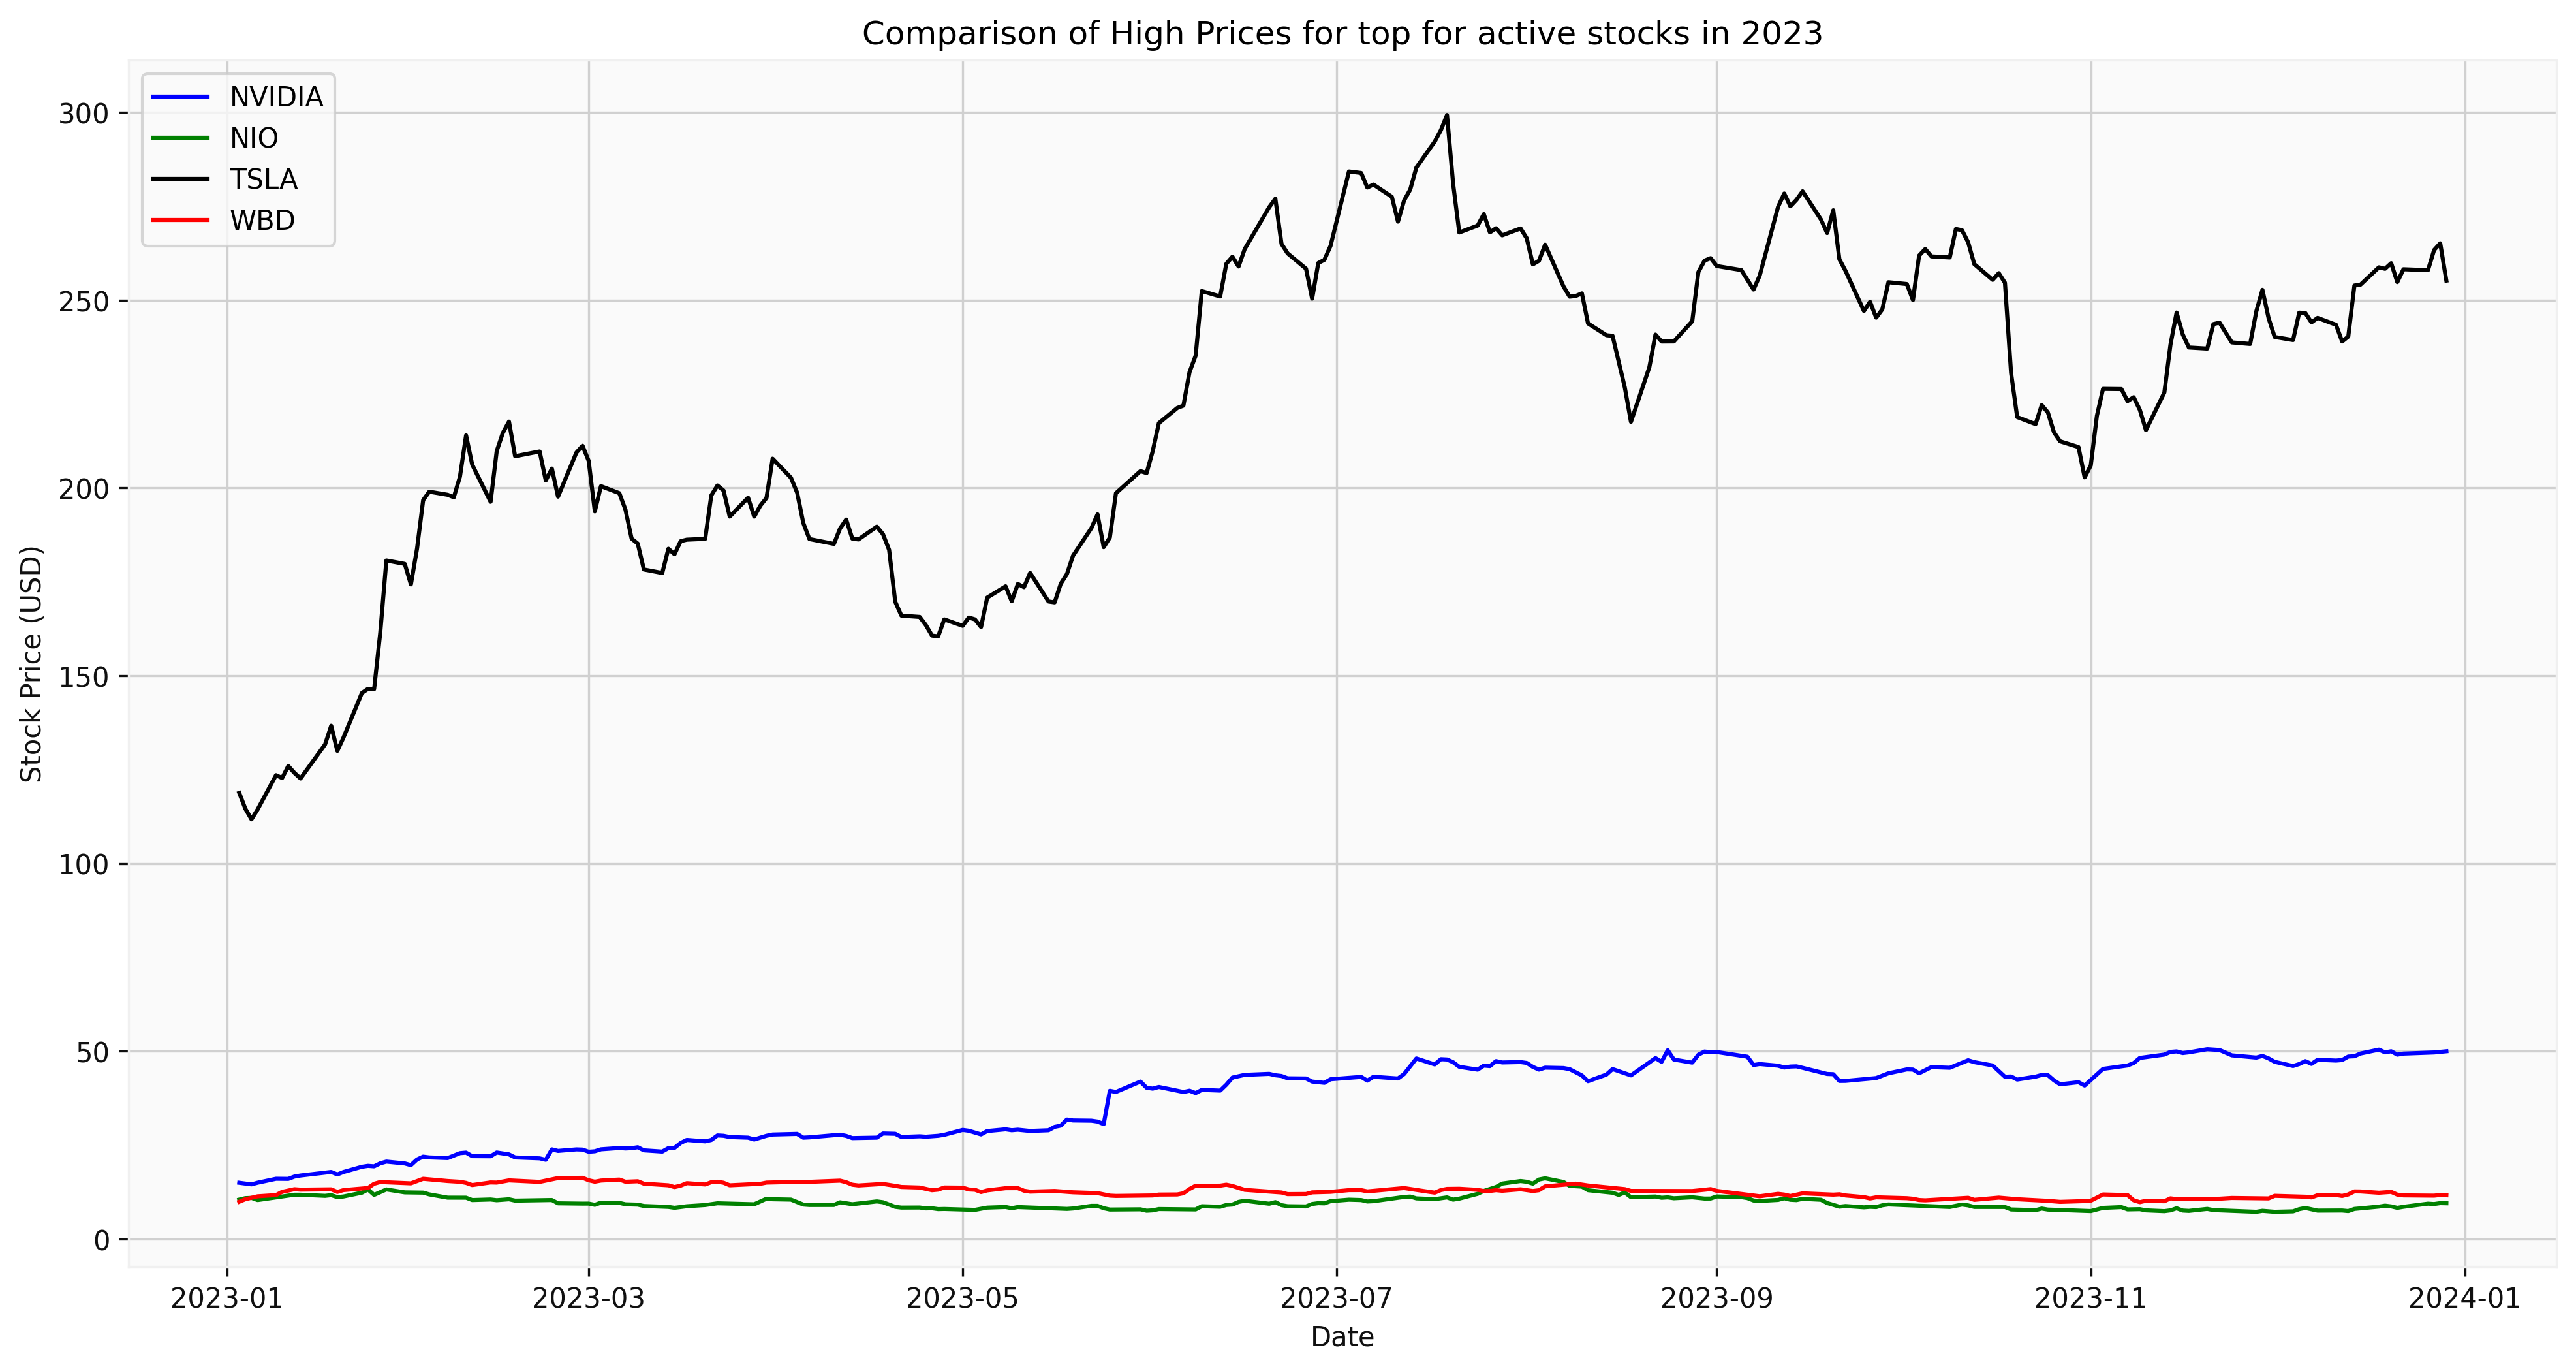

In [76]:
# your answer below this line
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for the top 4 active stocks for the last year
tickers = ['NVDA', 'NIO', 'TSLA', 'WBD']
data = yf.download(tickers, start='2023-01-01', end='2023-12-31')

# Plot the highcolumn for both stocks
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(data['High']['NVDA'], label='NVIDIA', color='blue')
plt.plot(data['High']['NIO'], label='NIO', color='green')
plt.plot(data['High']['TSLA'], label='TSLA', color='black')
plt.plot(data['High']['WBD'], label='WBD', color='red')

# Add labels, title, and legend
plt.title('Comparison of High Prices for top for active stocks in 2023')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()

# Show the plot
plt.show()



5.7 Go to the [FIAT Currency tickers list](https://finance.yahoo.com/currencies) and find the tickers for EUR/USD and GBP/USD, create a plot that shows the value from the close column for the last 3 years every day for each of the tickers.

[*********************100%***********************]  2 of 2 completed


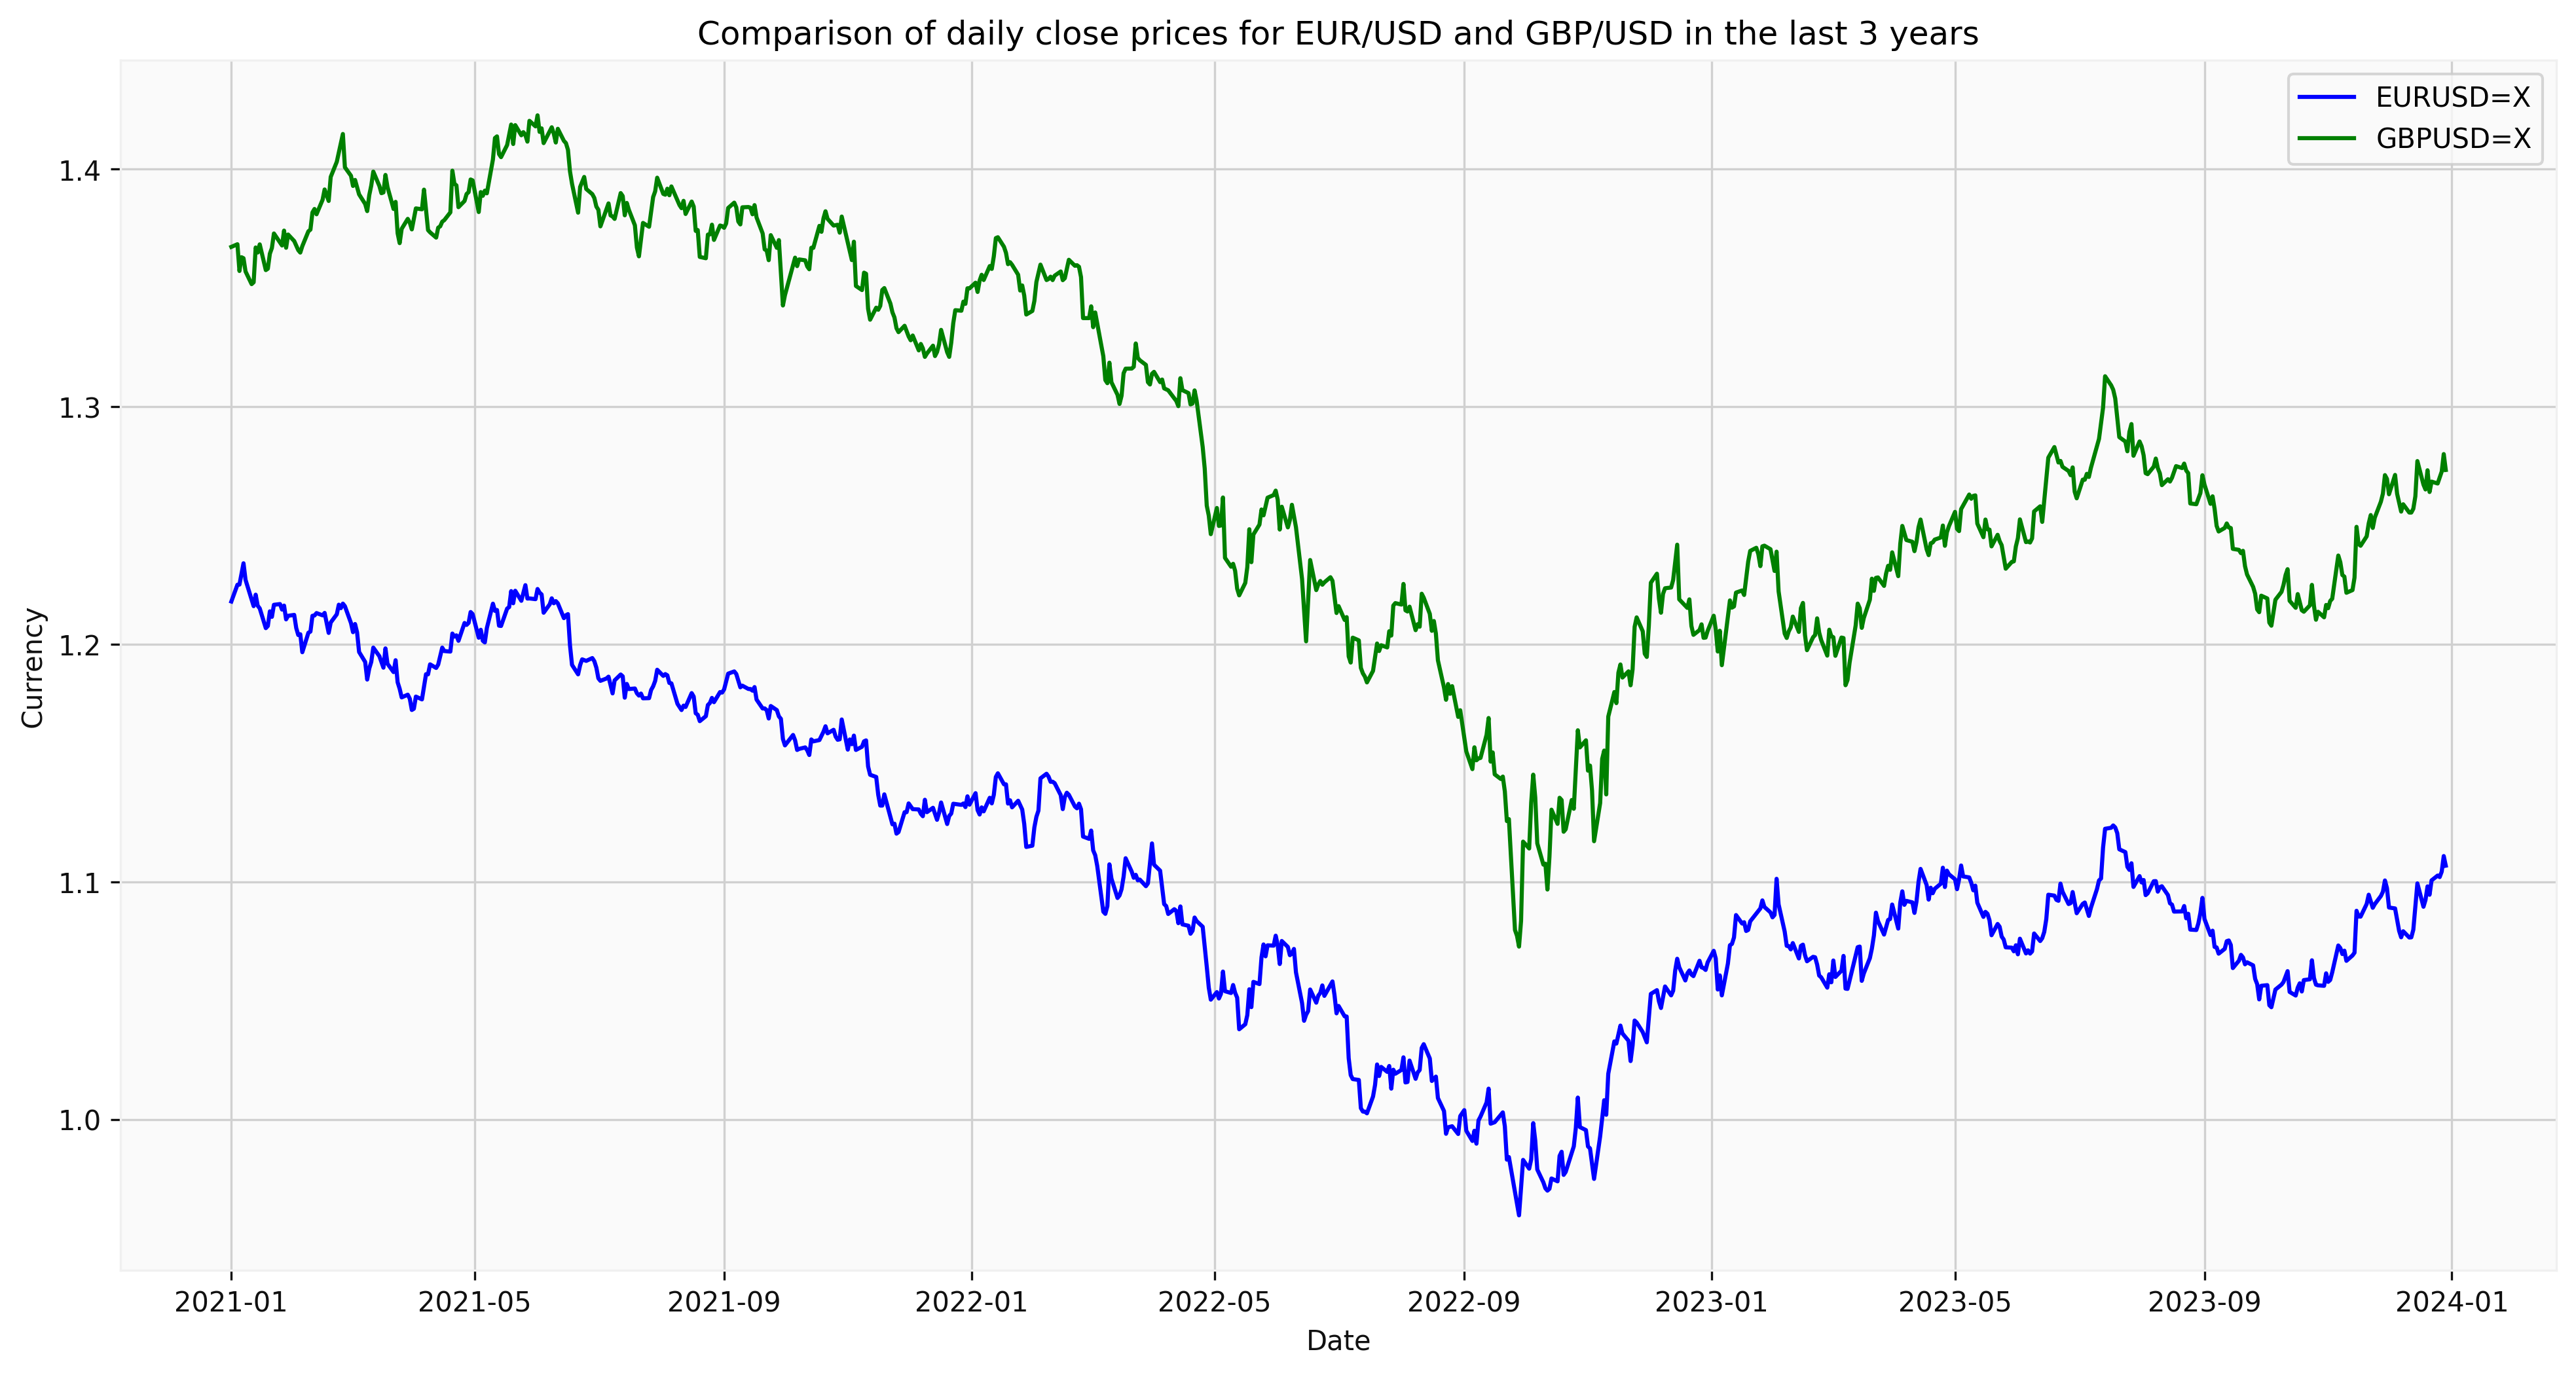

In [83]:
# your answer below this line
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for EUR/USD and GBP/USD for the last year
tickers = ['EURUSD=X', 'GBPUSD=X',]
data = yf.download(tickers, start='2021-01-01', end='2023-12-31')

# Plot the  close column  for both currencies
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(data['Close']['EURUSD=X'], label='EURUSD=X', color='blue')
plt.plot(data['Close']['GBPUSD=X'], label='GBPUSD=X', color='green')

# Add labels, title, and legend
plt.title('Comparison of daily close prices for EUR/USD and GBP/USD in the last 3 years')
plt.xlabel('Date')
plt.ylabel('Currency')
plt.legend()

# Show the plot
plt.show()

5.8 Adapt the chart from the previous question to add additional lines for the AUD/USD CAD/USD and NZD/USD, give each line an appropriate colour and add a legend and axis labels, print this chart out in 150dpi and make it 16x8 inches. Add gridlines to the plot?

[*********************100%***********************]  5 of 5 completed


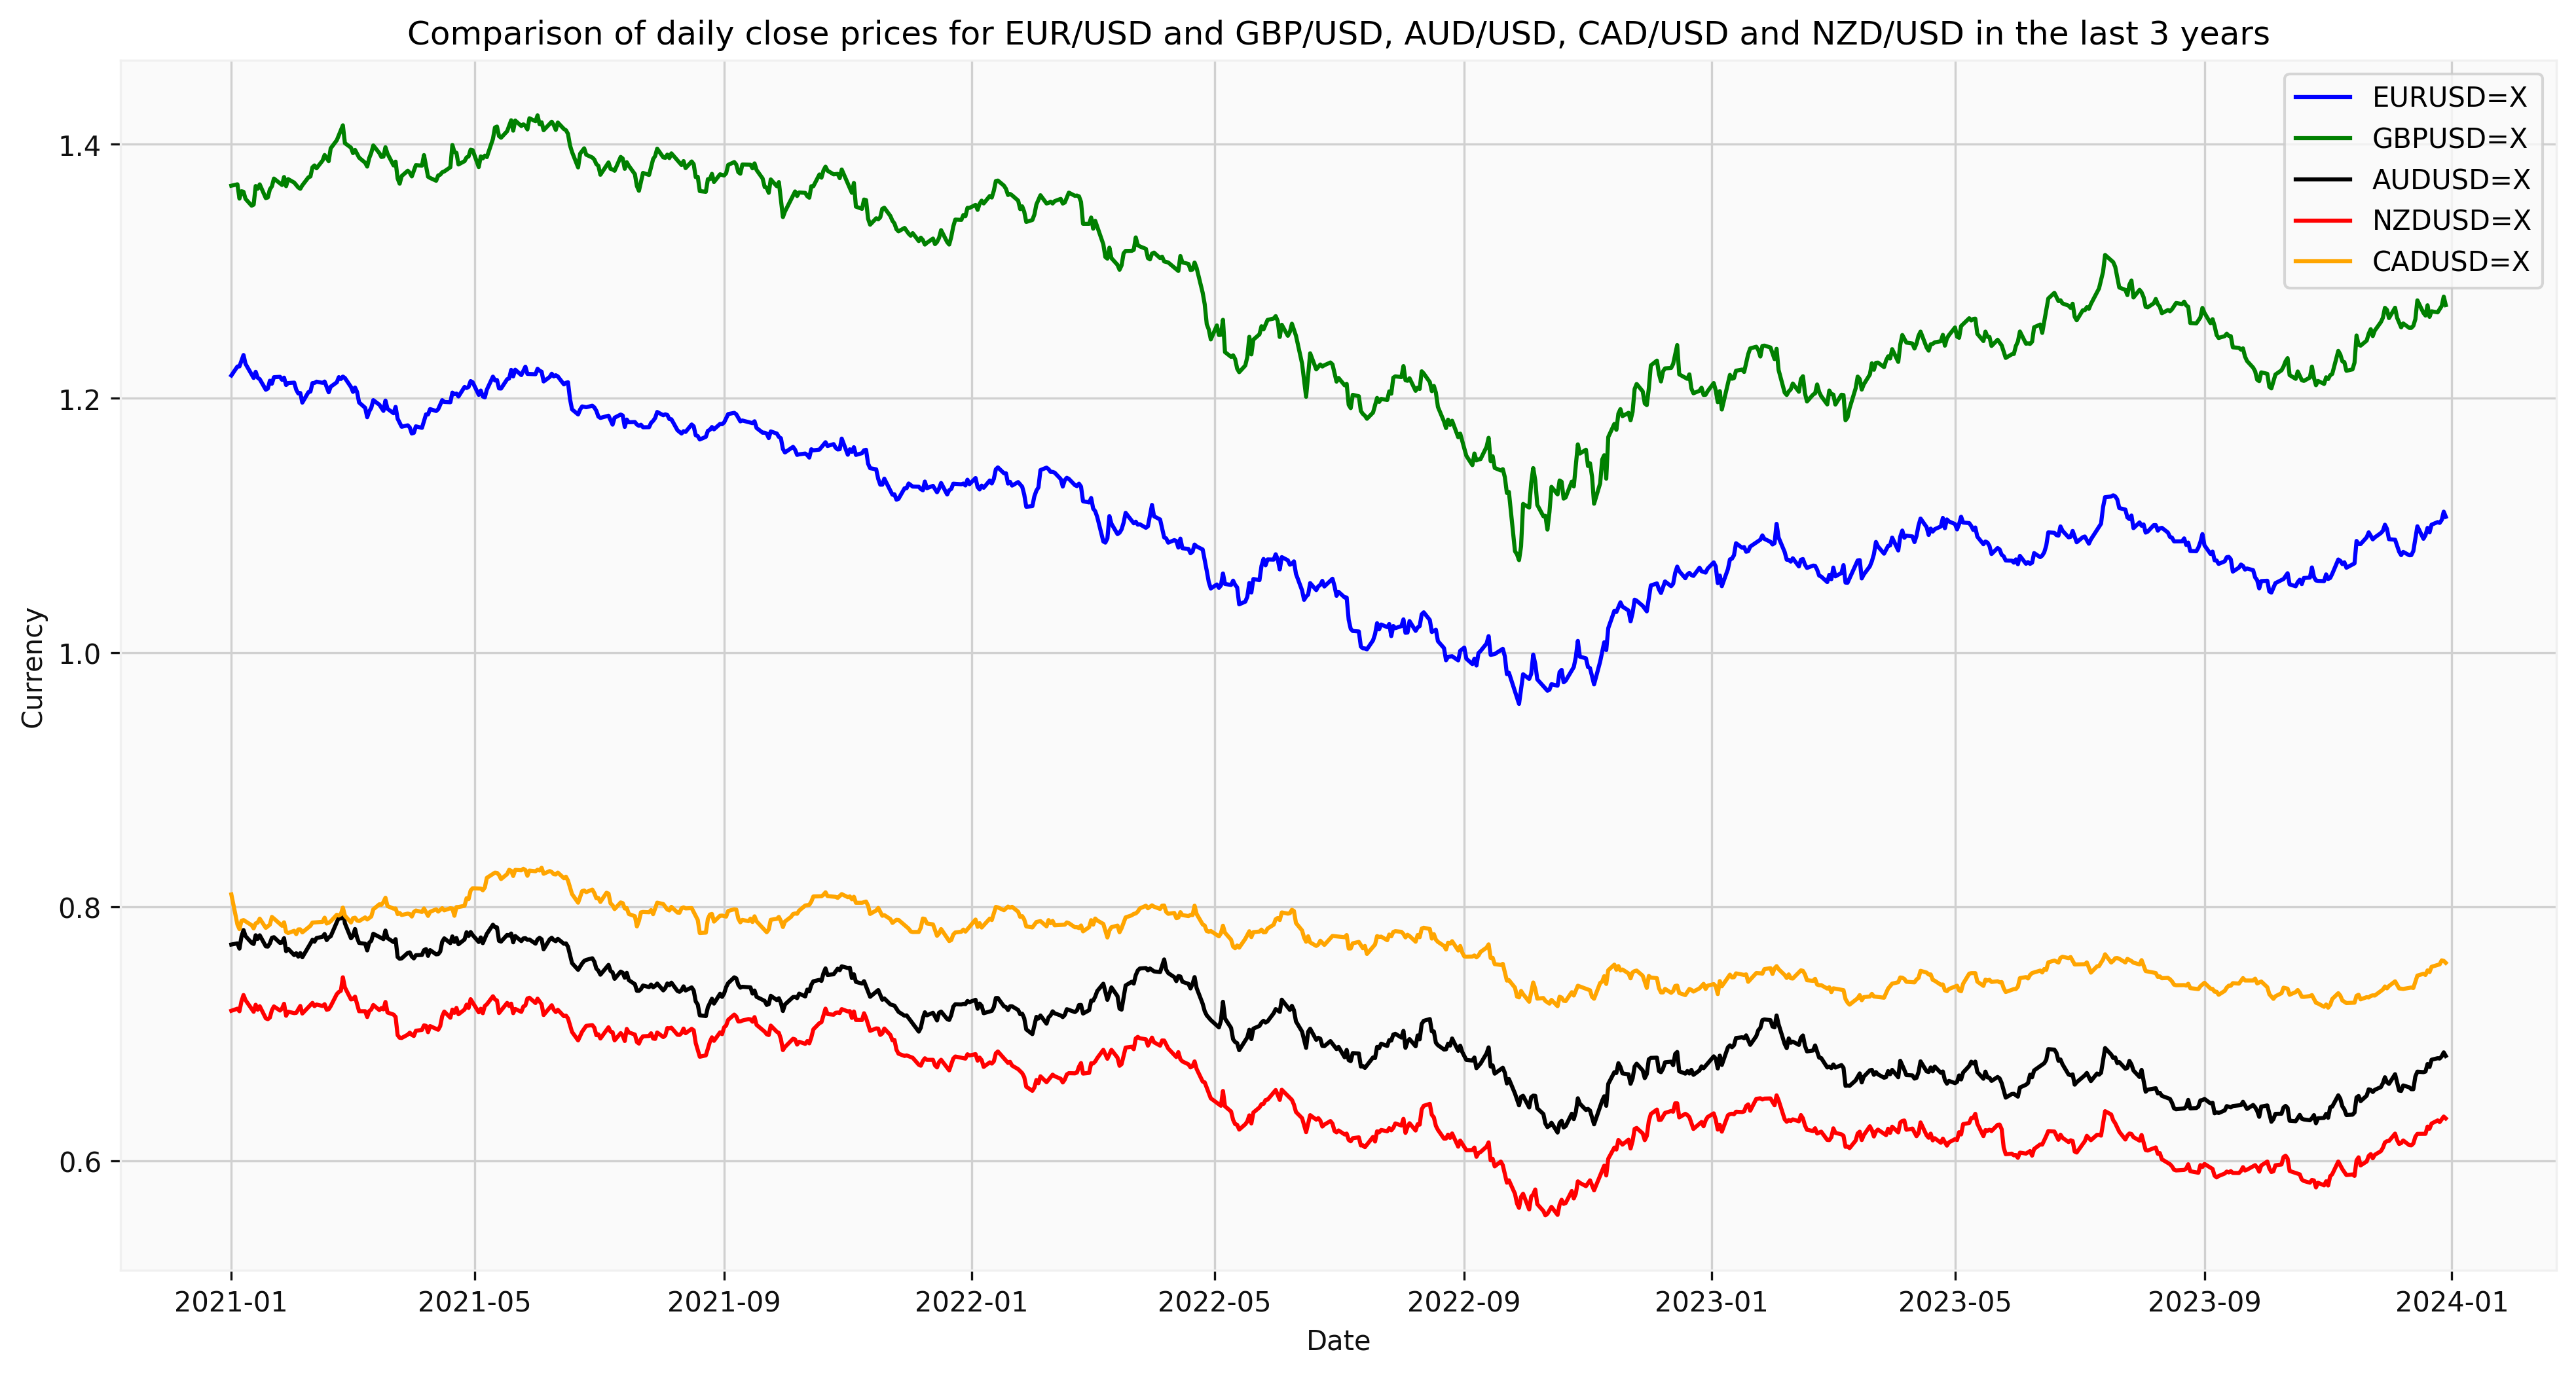

In [84]:
# your answer below this line
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for EUR/USD, GBP/USD, AUD/USD, CAD/USD and NZD/USD for the last year
tickers = ['EURUSD=X', 'GBPUSD=X','AUDUSD=X', 'NZDUSD=X', 'CADUSD=X']
data = yf.download(tickers, start='2021-01-01', end='2023-12-31')

# Plot the  close column  for both currencies
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(data['Close']['EURUSD=X'], label='EURUSD=X', color='blue')
plt.plot(data['Close']['GBPUSD=X'], label='GBPUSD=X', color='green')
plt.plot(data['Close']['AUDUSD=X'], label='AUDUSD=X', color='black')
plt.plot(data['Close']['NZDUSD=X'], label='NZDUSD=X', color='red')
plt.plot(data['Close']['CADUSD=X'], label='CADUSD=X', color='orange')
# Add labels, title, and legend
plt.title('Comparison of daily close prices for EUR/USD and GBP/USD, AUD/USD, CAD/USD and NZD/USD in the last 3 years')
plt.xlabel('Date')
plt.ylabel('Currency')
plt.legend()

# Show the plot
plt.show()
